In [8]:
import os
os.chdir("..")   # naik 1 folder dari notebooks ke root project
print(os.getcwd())
# Notebook: 01_eda_and_training.ipynb

# === Bagian 1: Import Library ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay

# Jika ingin pakai SMOTE:
from imblearn.over_sampling import SMOTE

# Supaya grafik tampil inline
%matplotlib inline

# === Bagian 2: Load Dataset ===
# Asumsi file CSV bernama “default_of_credit_card_clients.csv” di folder data/
df = pd.read_csv("data/default_of_credit_card_clients.csv", skiprows=1)  
# Dataset Kaggle kadang ada baris header ekstra — `skiprows=1` jika ada baris penjelasan pertama

# Cek beberapa baris awal
df.head()


c:\Users\rindi\Documents\credit-risk-app


,1,20000,2,2.1,1.1,24,2.2,2.3,-1,-1.1,...,0,0.1,0.2,0.3,689.1,0.4,0.5,0.6,0.7,1.2
0,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
1,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [9]:
# Info, statistik dasar, cek missing
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       29999 non-null  int64  
 1   20000   29999 non-null  float64
 2   2       29999 non-null  int64  
 3   2.1     29999 non-null  int64  
 4   1.1     29999 non-null  int64  
 5   24      29999 non-null  int64  
 6   2.2     29999 non-null  int64  
 7   2.3     29999 non-null  int64  
 8   -1      29999 non-null  int64  
 9   -1.1    29999 non-null  int64  
 10  -2      29999 non-null  int64  
 11  -2.1    29999 non-null  int64  
 12  3913    29999 non-null  float64
 13  3102    29999 non-null  float64
 14  689     29999 non-null  float64
 15  0       29999 non-null  float64
 16  0.1     29999 non-null  float64
 17  0.2     29999 non-null  float64
 18  0.3     29999 non-null  float64
 19  689.1   29999 non-null  float64
 20  0.4     29999 non-null  float64
 21  0.5     29999 non-null  float64
 22

1        0
20000    0
2        0
2.1      0
1.1      0
24       0
2.2      0
2.3      0
-1       0
-1.1     0
-2       0
-2.1     0
3913     0
3102     0
689      0
0        0
0.1      0
0.2      0
0.3      0
689.1    0
0.4      0
0.5      0
0.6      0
0.7      0
1.2      0
dtype: int64

In [10]:
# Ubah nama kolom target agar lebih mudah
# Di dataset ini nama kolom target adalah “default payment next month” atau “default.payment.next.month”
# Cek nama kolom
print(df.columns.tolist())

# Misal kolomnya “default payment next month”
df = df.rename(columns={"default payment next month": "default"})


['1', '20000', '2', '2.1', '1.1', '24', '2.2', '2.3', '-1', '-1.1', '-2', '-2.1', '3913', '3102', '689', '0', '0.1', '0.2', '0.3', '689.1', '0.4', '0.5', '0.6', '0.7', '1.2']


Kolom target 'default' tidak ditemukan!


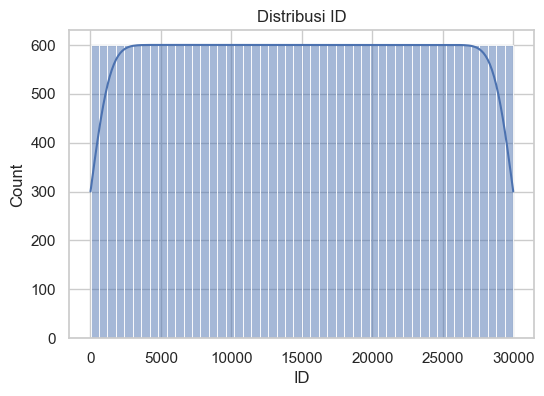

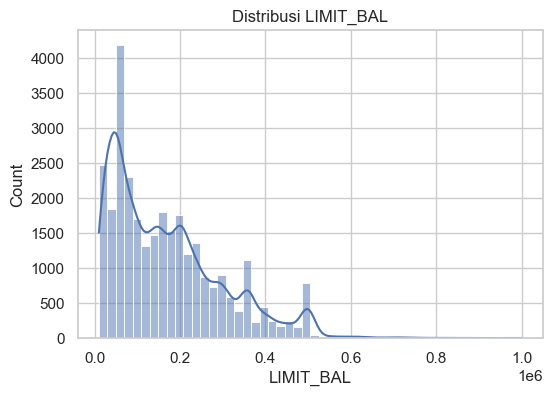

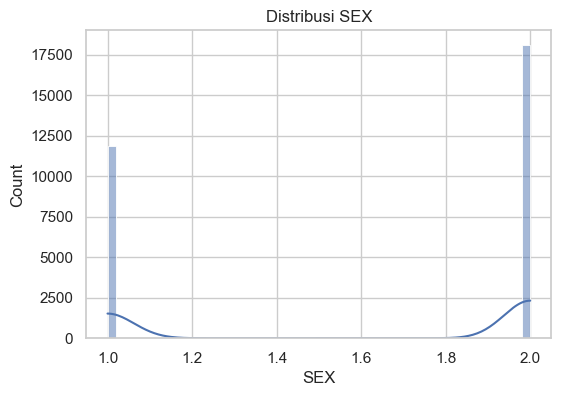

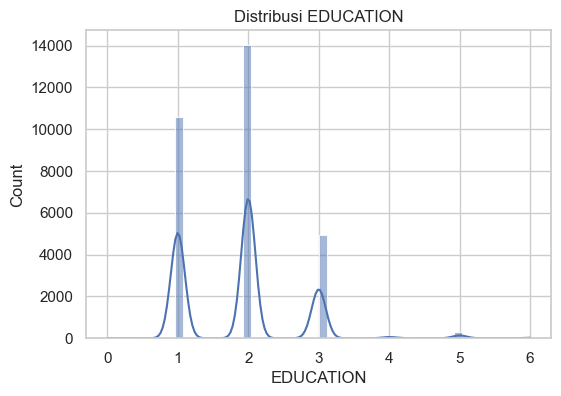

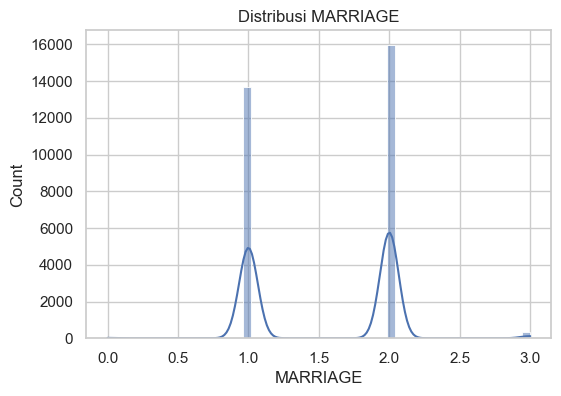

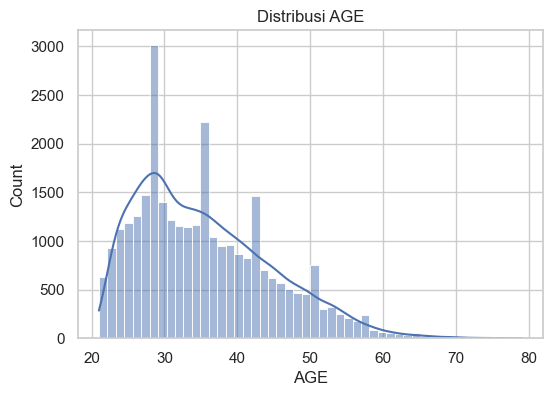

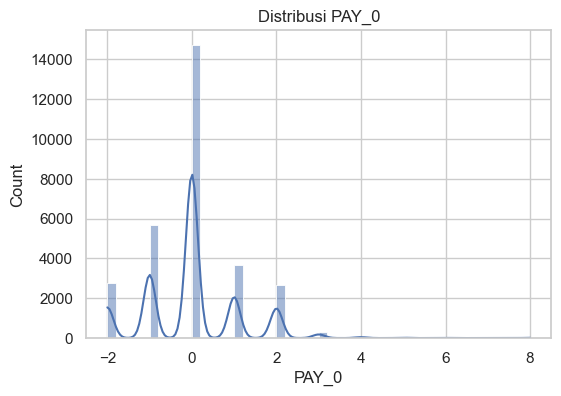

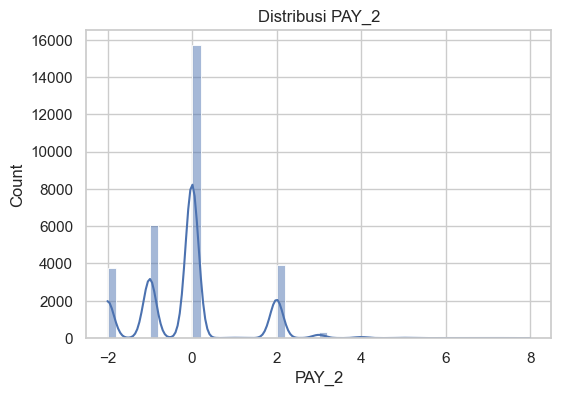

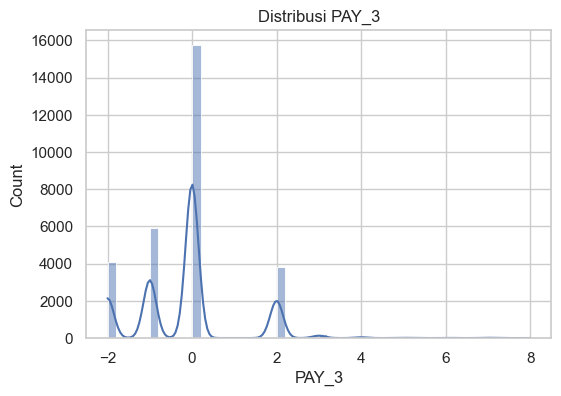

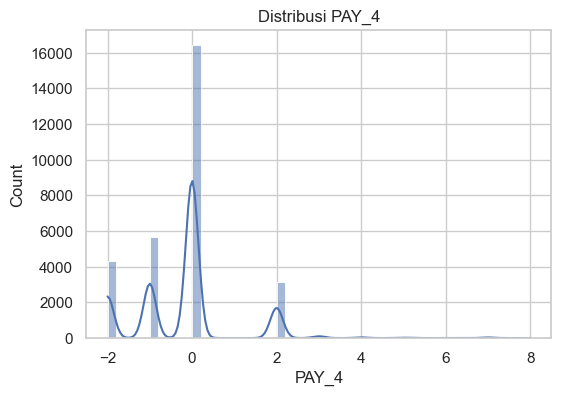

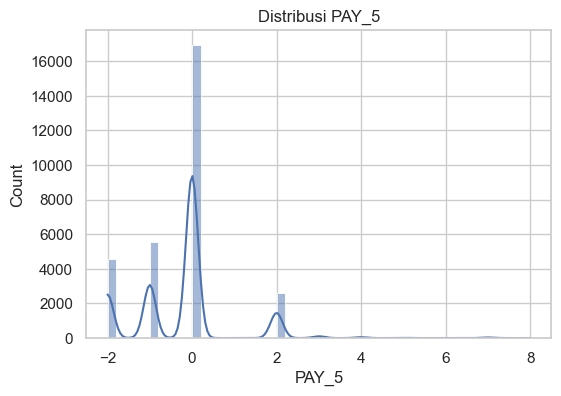

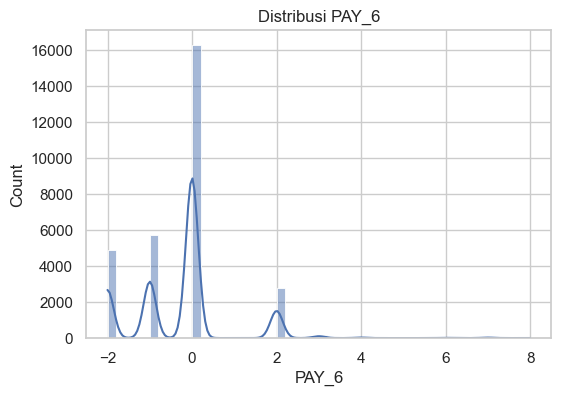

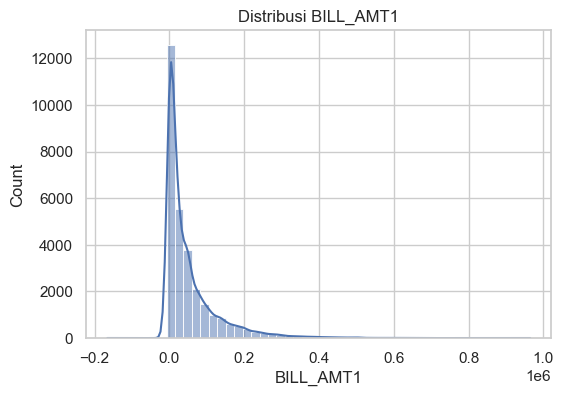

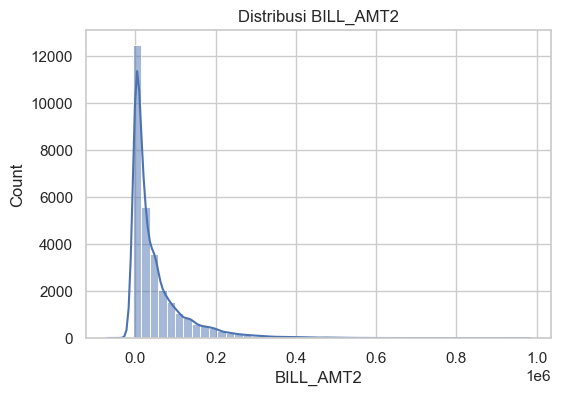

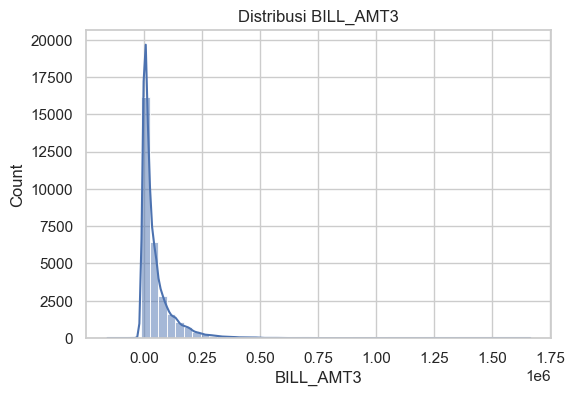

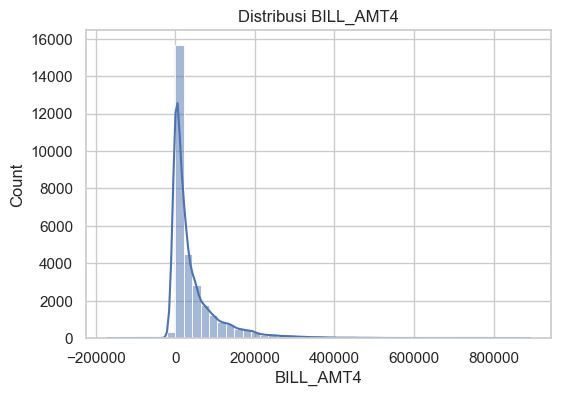

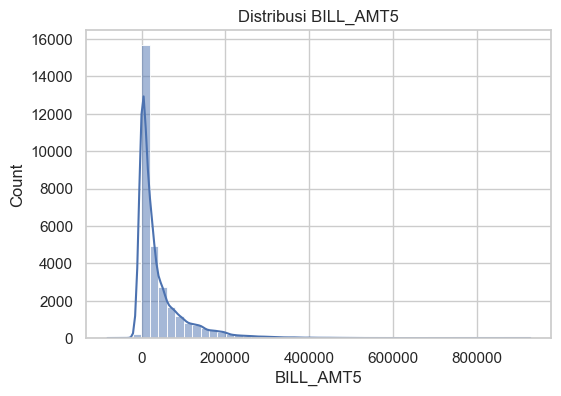

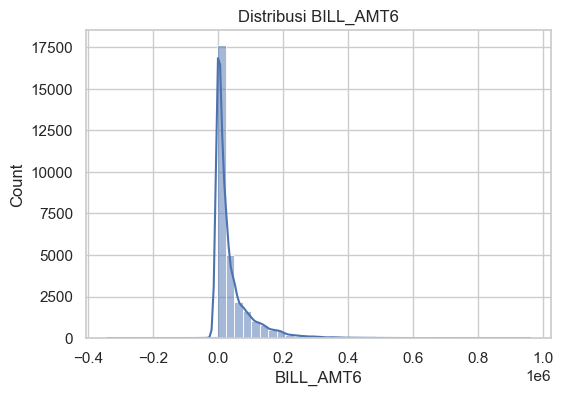

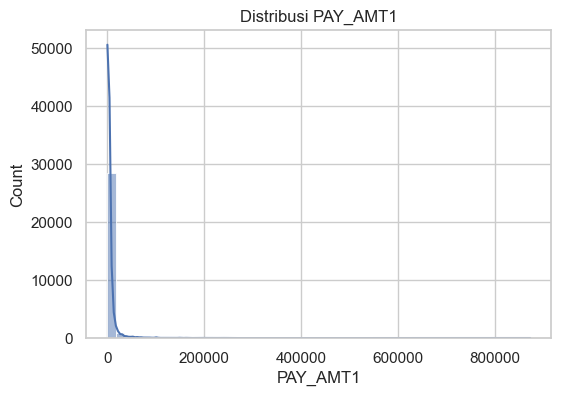

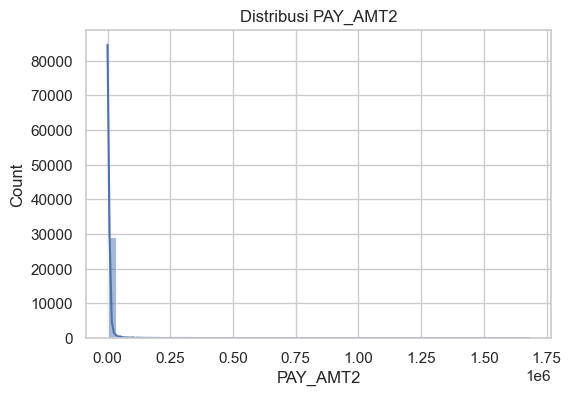

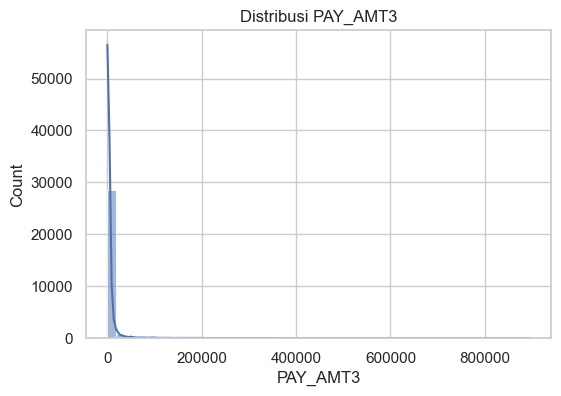

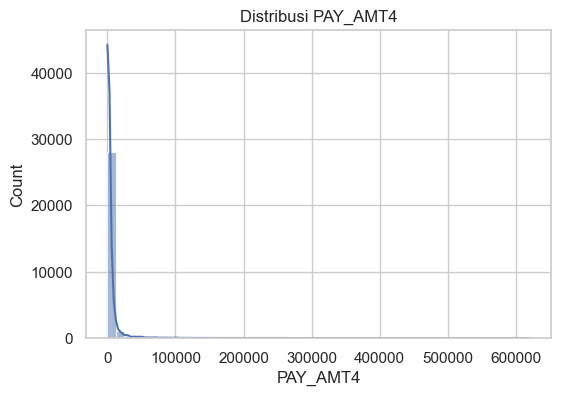

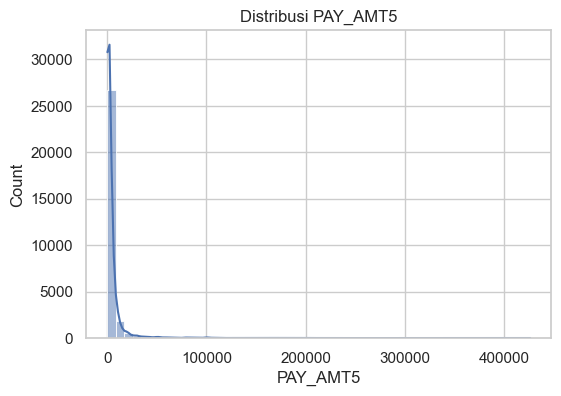

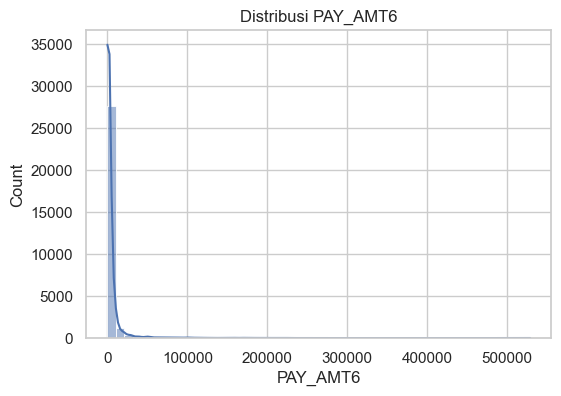

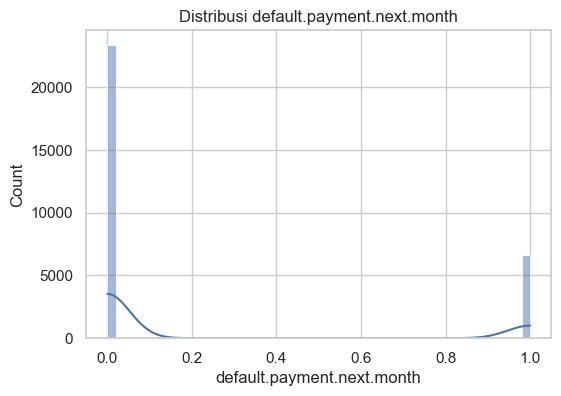

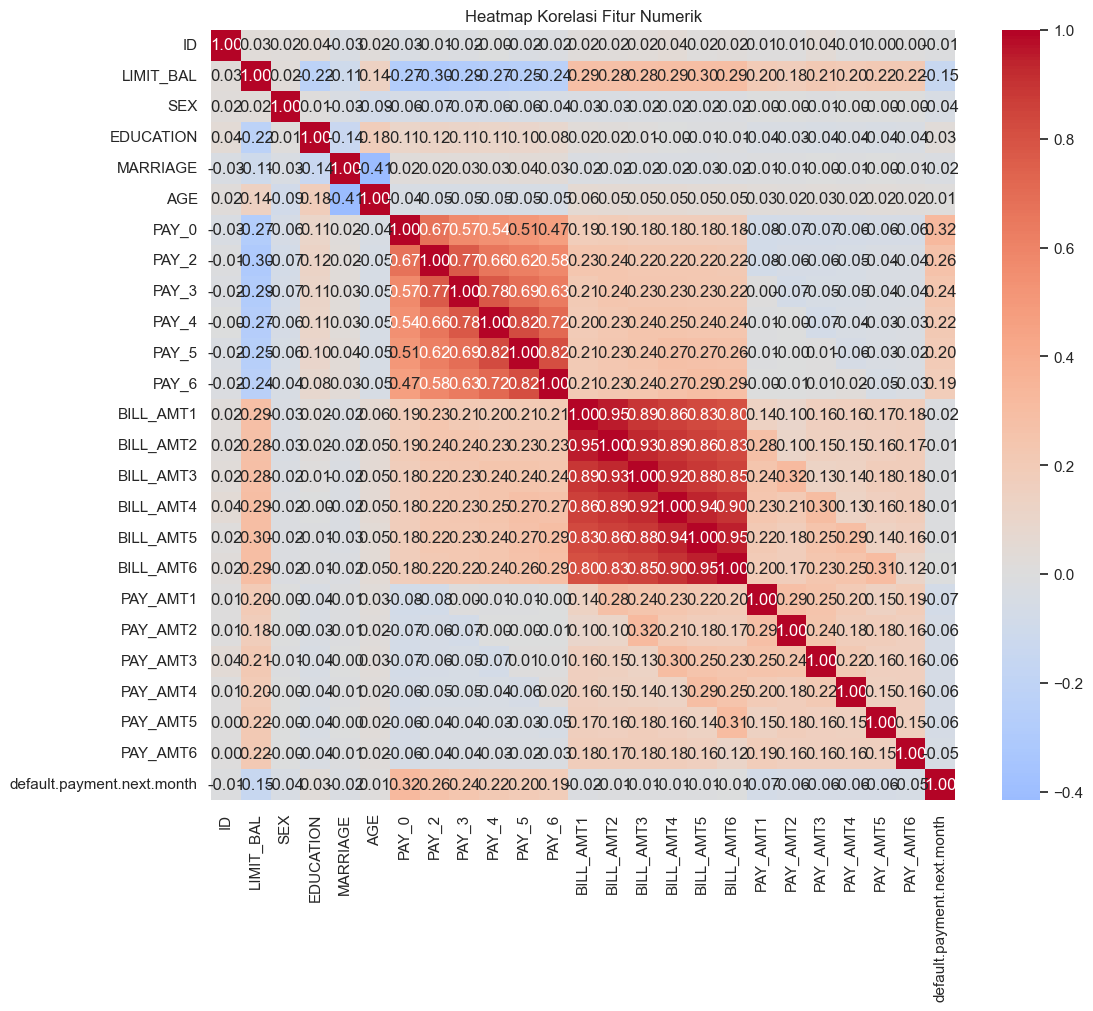

In [20]:


# === EDA Lengkap ===

# 1. Distribusi target
target_col = 'default'  # ganti sesuai nama kolom target di CSV
if target_col in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=target_col, data=df)
    plt.title("Distribusi Nasabah Default vs Tidak Default")
    plt.xlabel("Default (1 = Gagal Bayar)")
    plt.ylabel("Jumlah Nasabah")
    plt.show()
else:
    print(f"Kolom target '{target_col}' tidak ditemukan!")

# 2. Distribusi semua fitur numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribusi {col}")
    plt.show()

# 3. Distribusi semua fitur kategorikal
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45)
    plt.show()

# 4. Heatmap korelasi fitur numerik
plt.figure(figsize=(12,10))
corr = df[numerical_cols].corr()
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()




In [26]:
# === Bagian 4: Preprocessing & Split Aman ===

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# 1. Bersihkan spasi di nama kolom
df.columns = df.columns.str.strip()

# 2. Tampilkan semua kolom untuk pengecekan
print("Semua kolom di dataset:")
for i, col in enumerate(df.columns):
    print(i, col)

# 3. Cari kolom target secara otomatis
# Asumsi: kolom target adalah kolom terakhir
target_col = df.columns[-1]  # otomatis pakai kolom terakhir sebagai target
print(f"\nKolom target terdeteksi: '{target_col}'")

# 4. Coba deteksi kolom ID (nama 'ID' atau 'id')
id_candidates = [col for col in df.columns if col.lower() == 'id']
if len(id_candidates) == 0:
    id_col = None
    print("Kolom ID tidak ditemukan, akan diabaikan.")
else:
    id_col = id_candidates[0]
    print(f"Kolom ID terdeteksi: '{id_col}'")

# 5. Tentukan fitur & target
drop_cols = [target_col]
if id_col:
    drop_cols.append(id_col)

X = df.drop(columns=drop_cols)
y = df[target_col]

# 6. Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 7. Scale fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Tangani imbalance dengan SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

# 9. Tampilkan distribusi target sebelum & sesudah SMOTE
print("\nDistribusi target sebelum SMOTE:")
print(pd.Series(y_train).value_counts())
print("\nDistribusi target setelah SMOTE:")
print(pd.Series(y_train_res).value_counts())

# 10. Siap untuk training model
print("\nBagian 4 selesai: Data sudah siap untuk training model.")


Semua kolom di dataset:
0 ID
1 LIMIT_BAL
2 SEX
3 EDUCATION
4 MARRIAGE
5 AGE
6 PAY_0
7 PAY_2
8 PAY_3
9 PAY_4
10 PAY_5
11 PAY_6
12 BILL_AMT1
13 BILL_AMT2
14 BILL_AMT3
15 BILL_AMT4
16 BILL_AMT5
17 BILL_AMT6
18 PAY_AMT1
19 PAY_AMT2
20 PAY_AMT3
21 PAY_AMT4
22 PAY_AMT5
23 PAY_AMT6
24 default.payment.next.month

Kolom target terdeteksi: 'default.payment.next.month'
Kolom ID terdeteksi: 'ID'

Distribusi target sebelum SMOTE:
default.payment.next.month
0    16355
1     4645
Name: count, dtype: int64

Distribusi target setelah SMOTE:
default.payment.next.month
0    16355
1    16355
Name: count, dtype: int64

Bagian 4 selesai: Data sudah siap untuk training model.


In [28]:
# === Bagian 5: Model Training ===

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# 1. Buat model Logistic Regression
model = LogisticRegression(max_iter=1000, solver="lbfgs")

# 2. Training model dengan data train hasil SMOTE
model.fit(X_train_res, y_train_res)

# 3. Prediksi pada data test
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]

# 4. Evaluasi performa
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {acc:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)


Accuracy: 0.6716
ROC AUC: 0.7177
Confusion Matrix:
[[4771 2238]
 [ 718 1273]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.68      0.76      7009
           1       0.36      0.64      0.46      1991

    accuracy                           0.67      9000
   macro avg       0.62      0.66      0.61      9000
weighted avg       0.76      0.67      0.70      9000



===== Classification Report =====
              precision    recall  f1-score   support

           0       0.87      0.68      0.76      7009
           1       0.36      0.64      0.46      1991

    accuracy                           0.67      9000
   macro avg       0.62      0.66      0.61      9000
weighted avg       0.76      0.67      0.70      9000



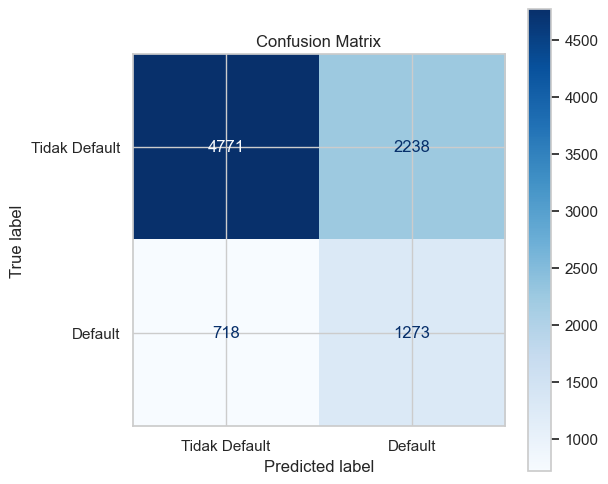

AUC: 0.7177


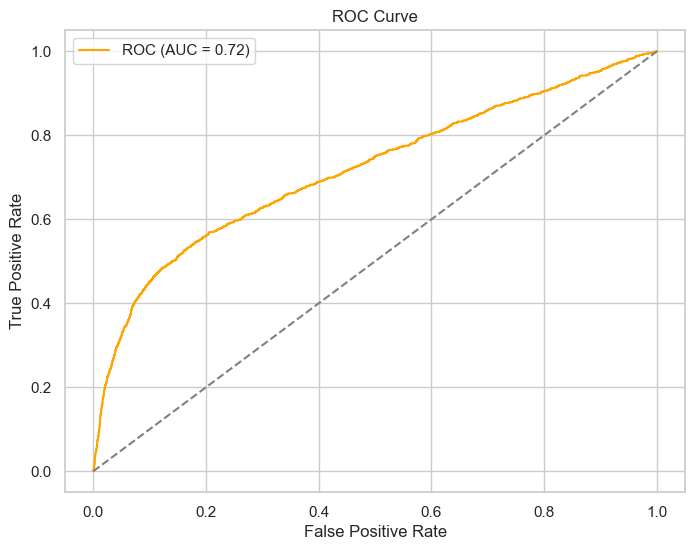

In [30]:
# === Bagian 6: Evaluasi Model ===

import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score
)

# 1. Classification Report
print("===== Classification Report =====")
print(classification_report(y_test, y_pred))

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Tidak Default","Default"])
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix")
plt.show()

# 3. ROC Curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.4f}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="orange", label=f"ROC (AUC = {auc:.2f})")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [32]:
# === Bagian 7: Simpan model & scaler ===

import os
import joblib

# 1. Pastikan folder 'models' ada
model_dir = "../models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"Folder '{model_dir}' dibuat.")

# 2. Simpan model & scaler
joblib.dump(model, os.path.join(model_dir, "logistic_model.joblib"))
joblib.dump(scaler, os.path.join(model_dir, "scaler.joblib"))

print("Model dan scaler telah berhasil disimpan di folder 'models'.")


Folder '../models' dibuat.
Model dan scaler telah berhasil disimpan di folder 'models'.
